In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ispu_dki1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ispu_dki2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ispu_dki3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ispu_dki4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ispu_dki5.csv')

In [ ]:
#merge dataset
merge = [df1, df2, df3, df4, df5]
df_merged = pd.concat(merge)

In [ ]:
df_merged = df_merged[df_merged['categori'] != 'TIDAK ADA DATA']
df_merged['categori'] = df_merged['categori'].replace({'SEDANG': 'SEHAT', 'BAIK': 'SEHAT',
                                         'TIDAK SEHAT': 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT': 'SANGAT TIDAK SEHAT',
                                         'BERBAHAYA': 'SANGAT TIDAK SEHAT'})

In [ ]:
print(df_merged['categori'])

0       SEHAT
1       SEHAT
2       SEHAT
3       SEHAT
4       SEHAT
        ...  
4378    SEHAT
4379    SEHAT
4380    SEHAT
4381    SEHAT
4382    SEHAT
Name: categori, Length: 19536, dtype: object


In [ ]:
Jumlah = df_merged['categori'].value_counts()
print(Jumlah)

SEHAT                 16726
TIDAK SEHAT            2606
SANGAT TIDAK SEHAT      204
Name: categori, dtype: int64


In [ ]:
Jumlah = df_merged['critical'].value_counts()
print(Jumlah)

O3      10715
PM10     6101
PM25     1902
CO        576
SO2       233
NO2         9
Name: critical, dtype: int64


In [ ]:
df_merged.to_csv('data_exported.csv', index=False)

In [ ]:
df_merged

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,NaN
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,NaN
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,NaN
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK,NaN
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,DKI5 (Kebon Jeruk),54.0,36.0,14.0,21.0,47.0,76.0,PM25,SEDANG,76.0
4379,2021-12-28,DKI5 (Kebon Jeruk),44.0,20.0,11.0,21.0,33.0,68.0,PM25,SEDANG,68.0
4380,2021-12-29,DKI5 (Kebon Jeruk),34.0,28.0,8.0,25.0,29.0,54.0,PM25,SEDANG,54.0
4381,2021-12-30,DKI5 (Kebon Jeruk),53.0,25.0,15.0,23.0,44.0,75.0,PM25,SEDANG,75.0


In [ ]:
df_merged.shape

(21915, 11)

In [ ]:
df_merged.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 'pm25'],
      dtype='object')

In [ ]:
df_merged.dtypes

tanggal      object
stasiun      object
pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
max         float64
critical     object
categori     object
pm25        float64
dtype: object

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21915 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   21915 non-null  object 
 1   stasiun   21915 non-null  object 
 2   pm10      18778 non-null  float64
 3   so2       18968 non-null  float64
 4   co        19144 non-null  float64
 5   o3        18890 non-null  float64
 6   no2       19009 non-null  float64
 7   max       21886 non-null  float64
 8   critical  19536 non-null  object 
 9   categori  21915 non-null  object 
 10  pm25      1725 non-null   float64
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


In [ ]:
df_merged.isnull().sum()

tanggal         0
stasiun         0
pm10         3137
so2          2947
co           2771
o3           3025
no2          2906
max            29
critical     2379
categori        0
pm25        20190
dtype: int64

In [ ]:
df_merged['pm10']=df_merged['pm10'].fillna((df_merged['pm10'].median()))
df_merged['so2']=df_merged['so2'].fillna((df_merged['so2'].median()))
df_merged['co']=df_merged['co'].fillna((df_merged['co'].median()))
df_merged['o3']=df_merged['o3'].fillna((df_merged['o3'].median()))
df_merged['no2']=df_merged['no2'].fillna((df_merged['no2'].median()))
df_merged['max']=df_merged['max'].fillna((df_merged['max'].median()))
df_merged['critical']=df_merged['critical'].fillna('O3')
df_merged['pm25']=df_merged['pm25'].fillna((df_merged['pm25'].median()))

In [ ]:
df_merged.isnull().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
pm25        0
dtype: int64

In [ ]:
df_merged.describe()

,pm10,so2,co,o3,no2,max,pm25
count,21915.000000,21915.000000,21915.000000,21915.000000,21915.000000,21915.000000,21915.000000
mean,53.383938,17.832809,20.566553,64.289665,12.183892,66.067534,78.004381
std,17.530213,11.819691,11.699255,34.328880,8.092818,38.552668,6.451982
min,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,13.000000
25%,45.000000,10.000000,13.000000,42.000000,8.000000,47.000000,78.000000
50%,55.000000,16.000000,18.000000,60.000000,11.000000,66.000000,78.000000
75%,63.000000,23.000000,26.000000,78.000000,15.000000,85.000000,78.000000
max,179.000000,112.000000,135.000000,314.000000,148.000000,314.000000,174.000000


In [ ]:
df_merged.to_csv('data_exported.csv', index=False)

yang paling berpengaruh terhadap polusi udara yaitu pm25 dan o3

In [ ]:
#brings up the 'stasiun' column and 'critical' column mode
critical_mode = df_merged['critical'].mode().values[0]

filtered_data = df_merged[df_merged['critical'] == critical_mode]
print(filtered_data[['stasiun', 'critical']])

                 stasiun critical
1     DKI1 (Bunderan HI)       O3
33    DKI1 (Bunderan HI)       O3
34    DKI1 (Bunderan HI)       O3
45    DKI1 (Bunderan HI)       O3
54    DKI1 (Bunderan HI)       O3
...                  ...      ...
3892  DKI5 (Kebon Jeruk)       O3
3893  DKI5 (Kebon Jeruk)       O3
3894  DKI5 (Kebon Jeruk)       O3
3895  DKI5 (Kebon Jeruk)       O3
4080  DKI5 (Kebon Jeruk)       O3

[13094 rows x 2 columns]


In [ ]:
#brings up the mode from the category column
category_mode = df_merged['categori'].mode().values[0]

print('Kategori udara yang paling sering atau paling banyak yaitu kategori :', category_mode)

Kategori udara yang paling sering atau paling banyak yaitu kategori : SEDANG


In [ ]:
#brings up the number of 'TIDAK SEHAT' categories in each station column
unhealthy_counts = df_merged[df_merged['categori'] == 'TIDAK SEHAT'].groupby('stasiun').size()

print('Jumlah kategori udara "TIDAK SEHAT" di setiap stasiun adalah : \n', unhealthy_counts)

Jumlah kategori udara "TIDAK SEHAT" di setiap stasiun adalah : 
 stasiun
DKI1 (Bunderan HI)      154
DKI2 (Kelapa Gading)    651
DKI3 (Jagakarsa)        647
DKI4 (Lubang Buaya)     556
DKI5 (Kebon Jeruk)      598
dtype: int64


In [ ]:
#brings up the number of 'SANGAT TIDAK SEHAT' categories in each station column
unhealthy_counts = df_merged[df_merged['categori'] == 'SANGAT TIDAK SEHAT'].groupby('stasiun').size()

print('Jumlah kategori udara "SANGAT TIDAK SEHAT" di setiap stasiun adalah : \n', unhealthy_counts)

Jumlah kategori udara "SANGAT TIDAK SEHAT" di setiap stasiun adalah : 
 stasiun
DKI2 (Kelapa Gading)    154
DKI3 (Jagakarsa)          9
DKI4 (Lubang Buaya)       4
DKI5 (Kebon Jeruk)       36
dtype: int64


In [ ]:
#brings up the number of 'BERBAHAYA' categories in each station column
unhealthy_counts = df_merged[df_merged['categori'] == 'BERBAHAYA'].groupby('stasiun').size()

print('Jumlah kategori udara "BERBAHAYA" di setiap stasiun adalah : \n', unhealthy_counts)

Jumlah kategori udara "BERBAHAYA" di setiap stasiun adalah : 
 stasiun
DKI2 (Kelapa Gading)    1
dtype: int64


In [ ]:
#brings up the number of o3 and pm25 in each station column
result = df_merged.groupby('stasiun')[['o3', 'pm25']].sum()

print('Jumlah o3 dan pm25 di setiap stasiun adalah : \n', result)

Jumlah o3 dan pm25 di setiap stasiun adalah : 
                             o3      pm25
stasiun                                 
DKI1 (Bunderan HI)    219151.0  338616.0
DKI2 (Kelapa Gading)  328439.0  341402.0
DKI3 (Jagakarsa)      298291.0  340528.0
DKI4 (Lubang Buaya)   267378.0  346775.0
DKI5 (Kebon Jeruk)    295649.0  342145.0


<ipython-input-24-3bb58027cc98>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




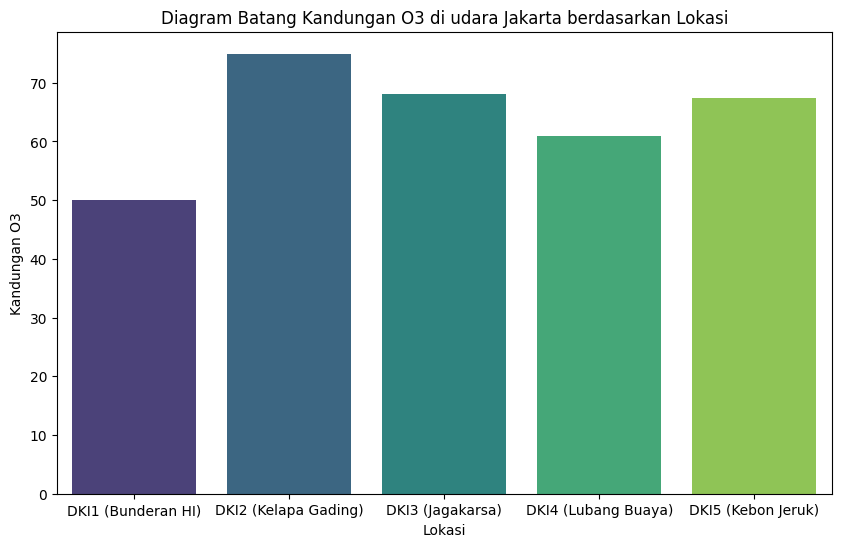

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='stasiun', y='o3', data=df_merged, ci=None, palette='viridis')
plt.xlabel('Lokasi')
plt.ylabel('Kandungan O3')
plt.title('Diagram Batang Kandungan O3 di udara Jakarta berdasarkan Lokasi')
plt.show()

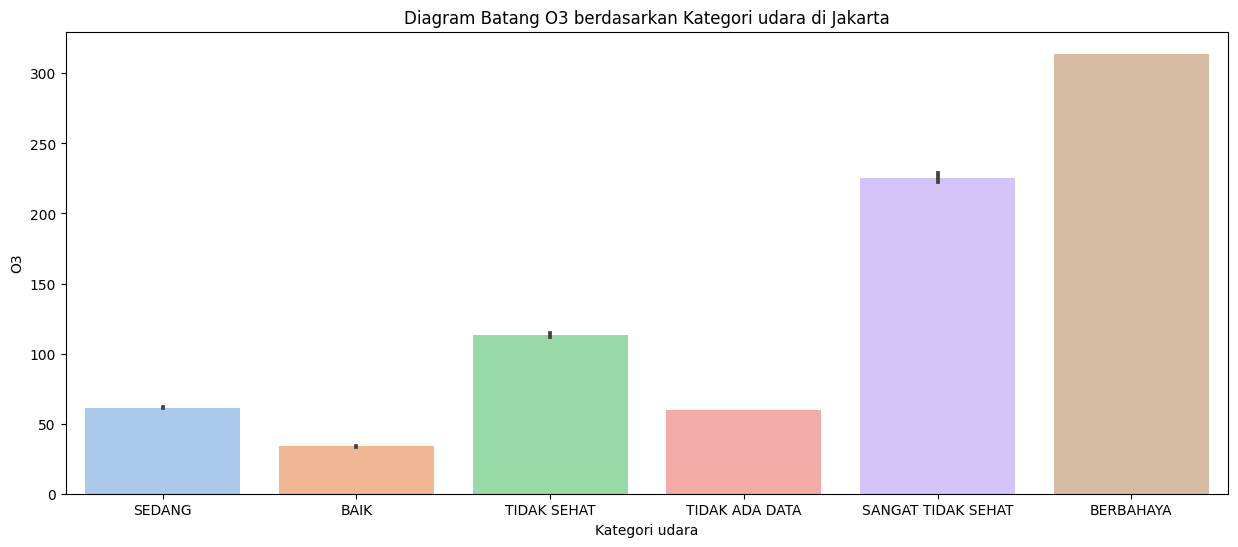

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='categori', y='o3', data=df_merged, palette='pastel')
plt.xlabel('Kategori udara')
plt.ylabel('O3')
plt.title('Diagram Batang O3 berdasarkan Kategori udara di Jakarta')
plt.show()

jika akurasi kecil, kategorinya diperkecil, bisa menggunakan

<ipython-input-28-40ba3cb5d87a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



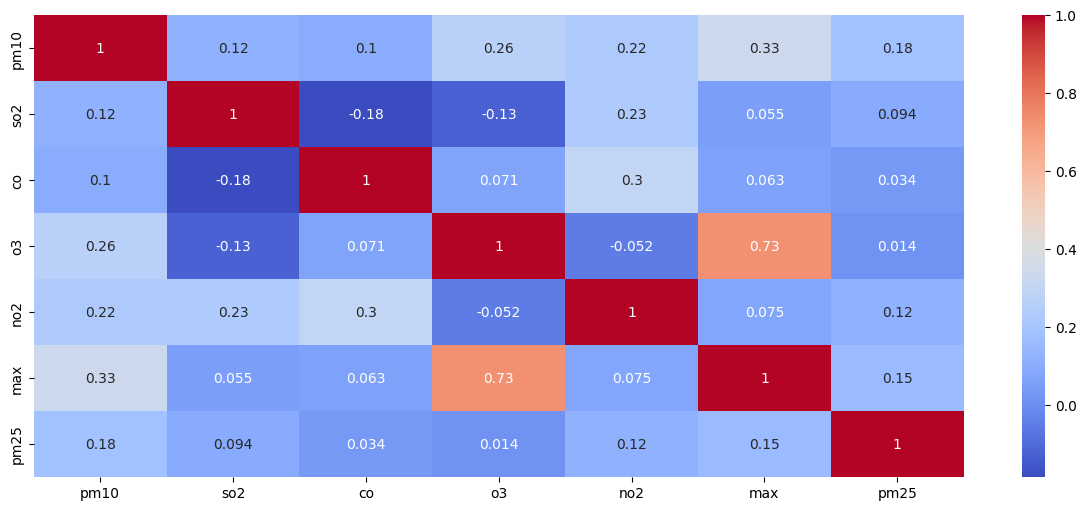

In [ ]:
plt.figure(figsize=(15, 6))
cor = df_merged.corr()
sns.heatmap(cor, cmap='coolwarm', annot=True)
plt.show()

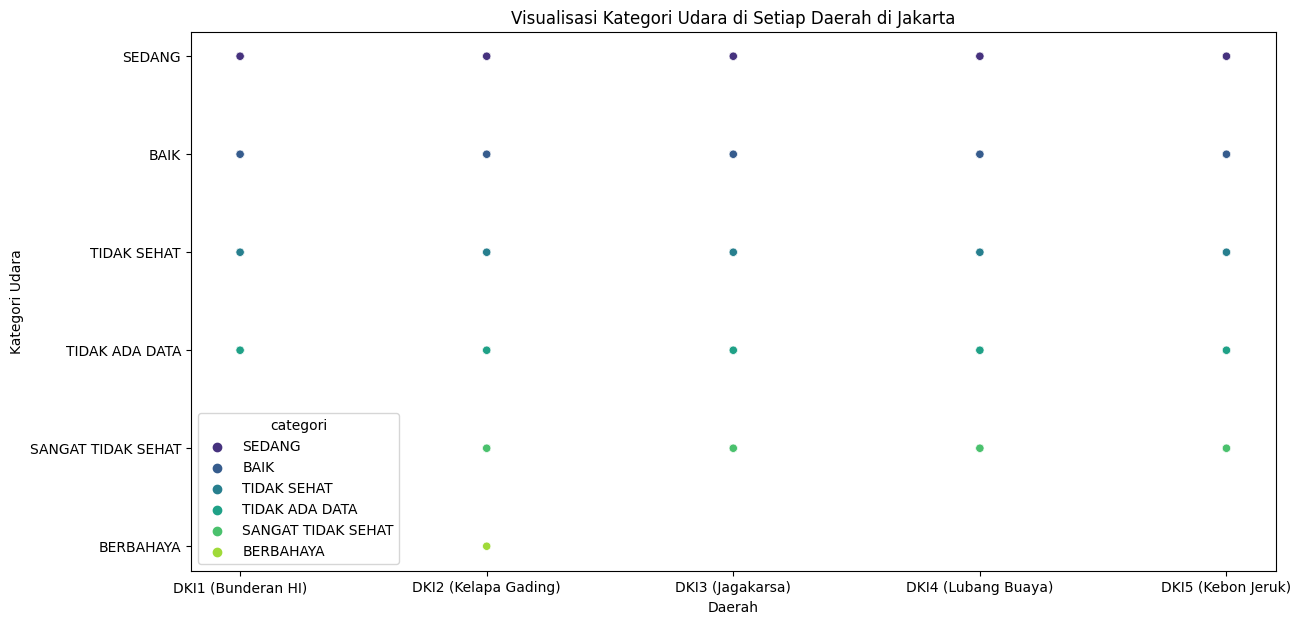

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='stasiun', y='categori', hue='categori', data=df_merged, palette='viridis')
plt.title('Visualisasi Kategori Udara di Setiap Daerah di Jakarta')
plt.xlabel('Daerah')
plt.ylabel('Kategori Udara')
plt.show()

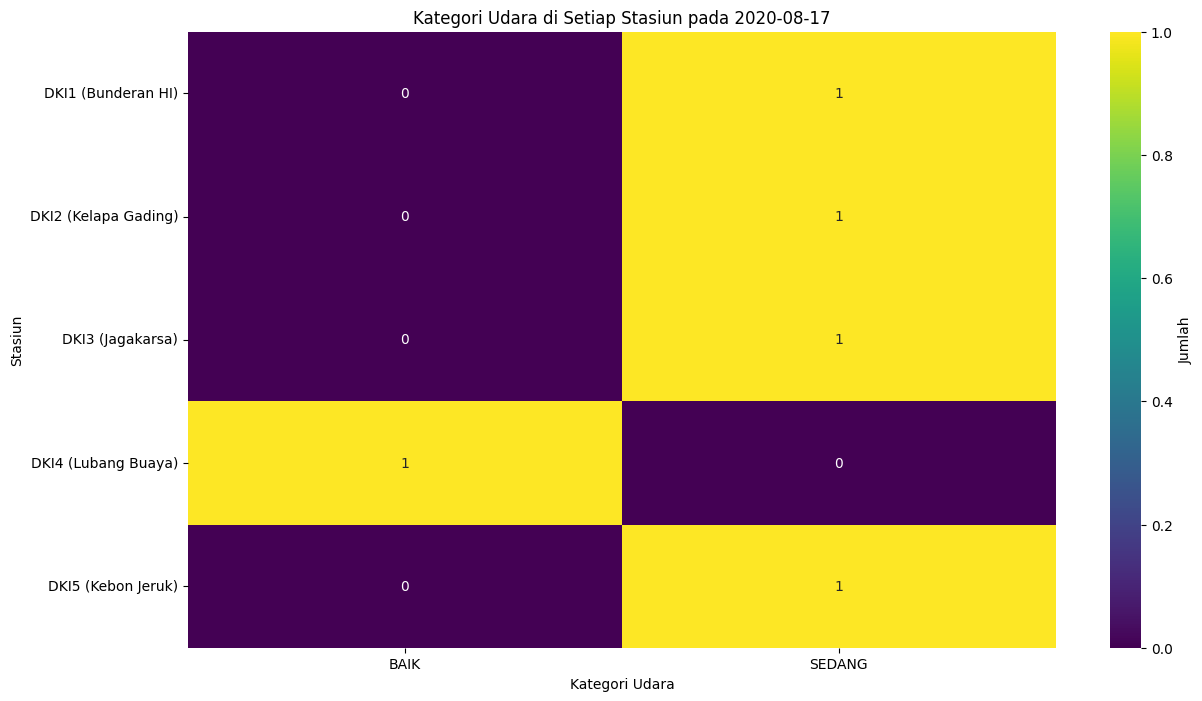

In [ ]:
# Bisa disesuaikan mau mencari tanggal berapa
selected_date = '2020-08-17'

selected_data = df_merged[df_merged['tanggal'] == selected_date]

heatmap_data = selected_data.pivot_table(index='stasiun', columns='categori', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Jumlah'})
plt.title(f'Kategori Udara di Setiap Stasiun pada {selected_date}')
plt.xlabel('Kategori Udara')
plt.ylabel('Stasiun')
plt.show()


In [ ]:
print(df_merged['categori'].unique())

['SEDANG' 'BAIK' 'TIDAK SEHAT' 'TIDAK ADA DATA' 'SANGAT TIDAK SEHAT'
 'BERBAHAYA']


In [ ]:
print(df_merged['categori'].nunique())

6


In [ ]:
Jumlah = df_merged['categori'].value_counts()
print(Jumlah)

# plt.figure(figsize=(15, 6))
# sns.barplot(x='categori', y=Jumlah, data=df_merged, palette='pastel')
# plt.xlabel('Kategori udara')
# plt.ylabel('pm25')
# plt.title('Diagram Batang pm25 berdasarkan Kategori udara di Jakarta')
# plt.show()

#dibuat 3 kategori, dan drop tidak ada data

SEDANG                13042
BAIK                   3684
TIDAK SEHAT            2606
TIDAK ADA DATA         2379
SANGAT TIDAK SEHAT      203
BERBAHAYA                 1
Name: categori, dtype: int64


## **INI 5 KATEGORI TIDAK PAKAI BALANCING**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
df_merged = df_merged[df_merged['categori'] != 'TIDAK ADA DATA']

In [ ]:
print(df_merged['categori'].unique())

['SEDANG' 'BAIK' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT' 'BERBAHAYA']


In [ ]:
X = df_merged.drop(["categori", "tanggal", "stasiun", "max", "critical"], axis=1)
y = df_merged["categori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [ ]:
X

,pm10,so2,co,o3,no2,pm25
0,60.0,4.0,73.0,27.0,14.0,78.0
1,32.0,2.0,16.0,33.0,9.0,78.0
2,27.0,2.0,19.0,20.0,9.0,78.0
3,22.0,2.0,16.0,15.0,6.0,78.0
4,25.0,2.0,17.0,15.0,8.0,78.0
...,...,...,...,...,...,...
4378,54.0,36.0,14.0,21.0,47.0,76.0
4379,44.0,20.0,11.0,21.0,33.0,68.0
4380,34.0,28.0,8.0,25.0,29.0,54.0
4381,53.0,25.0,15.0,23.0,44.0,75.0


In [ ]:
y

0       SEDANG
1         BAIK
2         BAIK
3         BAIK
4         BAIK
         ...  
4378    SEDANG
4379    SEDANG
4380    SEDANG
4381    SEDANG
4382    SEDANG
Name: categori, Length: 19536, dtype: object

In [ ]:
print(X.shape)
print(y.shape)

(19536, 6)
(19536,)


In [ ]:
# smote = SMOTE(random_state=42)

In [ ]:
# oversampler = RandomOverSampler(random_state=42)

In [ ]:
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
# print(X_train_resampled.shape)
# print(y_train_resampled.shape)

(48890, 6)
(48890,)


In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict= rf.predict(X_test)


In [ ]:
#Create confusion matrices
knn_cm = confusion_matrix(y_test, knn_predict)
dt_cm = confusion_matrix(y_test, dt_predict)
rf_cm = confusion_matrix(y_test, rf_predict)
# xgb_cm = confusion_matrix(y_test, xgb_predict)

In [ ]:
## Evaluasi performa model
knn_accuracy = accuracy_score(y_test, knn_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)
# xgb_accuracy = accuracy_score(y_test, xgb_predict)

knn_classification_rep = classification_report(y_test, knn_predict)
dt_classification_rep = classification_report(y_test, dt_predict)
rf_classification_rep = classification_report(y_test, rf_predict)
# xgb_classification_rep = classification_report(y_test, xgb_predict)

In [ ]:
print("K-Nearest Neighbors (KNN)")
print('confussion matrix : \n', knn_cm)
print('\n')
print('accuracy :', knn_accuracy)
print('\n')
print('clasification report :\n', knn_classification_rep)

K-Nearest Neighbors (KNN)
confussion matrix : 
 [[ 805    0   96    0]
 [   0   46    0    2]
 [  79    0 3169   16]
 [   0    2   41  628]]


accuracy : 0.9516789516789517


clasification report :
                     precision    recall  f1-score   support

              BAIK       0.91      0.89      0.90       901
SANGAT TIDAK SEHAT       0.96      0.96      0.96        48
            SEDANG       0.96      0.97      0.96      3264
       TIDAK SEHAT       0.97      0.94      0.95       671

          accuracy                           0.95      4884
         macro avg       0.95      0.94      0.94      4884
      weighted avg       0.95      0.95      0.95      4884



In [ ]:
print("Decision Tree")
print('confussion matrix : \n', dt_cm)
print('\n')
print('accuracy :', dt_accuracy)
print('\n')
print('clasification report : \n', dt_classification_rep)

Decision Tree
confussion matrix : 
 [[ 874    0   27    0]
 [   0   48    0    0]
 [  58    0 3203    3]
 [   0    0    3  668]]


accuracy : 0.9813677313677314


clasification report : 
                     precision    recall  f1-score   support

              BAIK       0.94      0.97      0.95       901
SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
            SEDANG       0.99      0.98      0.99      3264
       TIDAK SEHAT       1.00      1.00      1.00       671

          accuracy                           0.98      4884
         macro avg       0.98      0.99      0.98      4884
      weighted avg       0.98      0.98      0.98      4884



In [ ]:
print("Random Forest")
print('confussion matrix : \n', rf_cm )
print('\n')
print('accuracy :', rf_accuracy)
print('\n')
print('clasification report :\n', rf_classification_rep)

Random Forest
confussion matrix : 
 [[ 869    0   32    0]
 [   0   48    0    0]
 [  31    0 3233    0]
 [   0    0    3  668]]


accuracy : 0.9864864864864865


clasification report :
                     precision    recall  f1-score   support

              BAIK       0.97      0.96      0.97       901
SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
            SEDANG       0.99      0.99      0.99      3264
       TIDAK SEHAT       1.00      1.00      1.00       671

          accuracy                           0.99      4884
         macro avg       0.99      0.99      0.99      4884
      weighted avg       0.99      0.99      0.99      4884



## **INI 5 KATEGORI PAKAI BALANCING**

In [ ]:
# from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

In [ ]:
# print(df_merged['categori'].unique())

In [ ]:
# X = df_merged.drop(["categori", "tanggal", "stasiun", "max", "critical"], axis=1)
# y = df_merged["categori"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# smote = SMOTE(random_state=42)

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(48890, 6)
(48890,)


In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
knn_predict = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)
dt_predict = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_predict= rf.predict(X_test)


In [ ]:
#Create confusion matrices
knn_cm = confusion_matrix(y_test, knn_predict)
dt_cm = confusion_matrix(y_test, dt_predict)
rf_cm = confusion_matrix(y_test, rf_predict)

In [ ]:
## Evaluasi performa model
knn_accuracy = accuracy_score(y_test, knn_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)

knn_classification_rep = classification_report(y_test, knn_predict)
dt_classification_rep = classification_report(y_test, dt_predict)
rf_classification_rep = classification_report(y_test, rf_predict)


In [ ]:
print("K-Nearest Neighbors (KNN)")
print('confussion matrix : \n', knn_cm)
print('\n')
print('accuracy :', knn_accuracy)
print('\n')
print('clasification report :\n', knn_classification_rep)

K-Nearest Neighbors (KNN)
confussion matrix : 
 [[ 854    0   47    0]
 [   0   47    0    1]
 [ 258    0 2932   74]
 [   0    2   12  657]]


accuracy : 0.9193284193284194


clasification report :
                     precision    recall  f1-score   support

              BAIK       0.77      0.95      0.85       901
SANGAT TIDAK SEHAT       0.96      0.98      0.97        48
            SEDANG       0.98      0.90      0.94      3264
       TIDAK SEHAT       0.90      0.98      0.94       671

          accuracy                           0.92      4884
         macro avg       0.90      0.95      0.92      4884
      weighted avg       0.93      0.92      0.92      4884



In [ ]:
print("Decision Tree")
print('confussion matrix : \n', dt_cm)
print('\n')
print('accuracy :', dt_accuracy)
print('\n')
print('clasification report : \n', dt_classification_rep)

Decision Tree
confussion matrix : 
 [[ 866    0   35    0]
 [   0   48    0    0]
 [  48    0 3214    2]
 [   0    0    4  667]]


accuracy : 0.9817772317772318


clasification report : 
                     precision    recall  f1-score   support

              BAIK       0.95      0.96      0.95       901
SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
            SEDANG       0.99      0.98      0.99      3264
       TIDAK SEHAT       1.00      0.99      1.00       671

          accuracy                           0.98      4884
         macro avg       0.98      0.98      0.98      4884
      weighted avg       0.98      0.98      0.98      4884



In [ ]:
print("Random Forest")
print('confussion matrix : \n', rf_cm )
print('\n')
print('accuracy :', rf_accuracy)
print('\n')
print('clasification report :\n', rf_classification_rep)

Random Forest
confussion matrix : 
 [[ 877    0   24    0]
 [   0   48    0    0]
 [  40    0 3224    0]
 [   0    0    3  668]]


accuracy : 0.9862817362817363


clasification report :
                     precision    recall  f1-score   support

              BAIK       0.96      0.97      0.96       901
SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
            SEDANG       0.99      0.99      0.99      3264
       TIDAK SEHAT       1.00      1.00      1.00       671

          accuracy                           0.99      4884
         macro avg       0.99      0.99      0.99      4884
      weighted avg       0.99      0.99      0.99      4884



## **INI 3 KATEGORI SEBELUM BALANCING**

In [ ]:
df_merged['categori'] = df_merged['categori'].replace({'SEDANG': 'SEHAT', 'BAIK': 'SEHAT',
                                         'TIDAK SEHAT': 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT': 'SANGAT TIDAK SEHAT',
                                         'BERBAHAYA': 'SANGAT TIDAK SEHAT'})

In [ ]:
# Assuming target column is named 'target'
X = df_merged.drop(["categori", "tanggal", "stasiun", "max", "critical"], axis=1)
y = df_merged["categori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X

,pm10,so2,co,o3,no2,pm25
0,60.0,4.0,73.0,27.0,14.0,78.0
1,32.0,2.0,16.0,33.0,9.0,78.0
2,27.0,2.0,19.0,20.0,9.0,78.0
3,22.0,2.0,16.0,15.0,6.0,78.0
4,25.0,2.0,17.0,15.0,8.0,78.0
...,...,...,...,...,...,...
4378,54.0,36.0,14.0,21.0,47.0,76.0
4379,44.0,20.0,11.0,21.0,33.0,68.0
4380,34.0,28.0,8.0,25.0,29.0,54.0
4381,53.0,25.0,15.0,23.0,44.0,75.0


In [ ]:
y

0       SEHAT
1       SEHAT
2       SEHAT
3       SEHAT
4       SEHAT
        ...  
4378    SEHAT
4379    SEHAT
4380    SEHAT
4381    SEHAT
4382    SEHAT
Name: categori, Length: 19536, dtype: object

In [ ]:
print(X.shape)
print(y.shape)

(19536, 6)
(19536,)


In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict= rf.predict(X_test)

In [ ]:
#Create confusion matrices
knn_cm = confusion_matrix(y_test, knn_predict)
dt_cm = confusion_matrix(y_test, dt_predict)
rf_cm = confusion_matrix(y_test, rf_predict)


In [ ]:
## Evaluasi performa model
knn_accuracy = accuracy_score(y_test, knn_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)

knn_classification_rep = classification_report(y_test, knn_predict)
dt_classification_rep = classification_report(y_test, dt_predict)
rf_classification_rep = classification_report(y_test, rf_predict)

In [ ]:
print("K-Nearest Neighbors (KNN)")
print('confussion matrix : \n', knn_cm)
print('\n')
print('accuracy :', knn_accuracy)
print('\n')
print('clasification report :\n', knn_classification_rep)

K-Nearest Neighbors (KNN)
confussion matrix : 
 [[  46    0    2]
 [   0 4149   16]
 [   2   41  628]]


accuracy : 0.9875102375102375


clasification report :
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       0.96      0.96      0.96        48
             SEHAT       0.99      1.00      0.99      4165
       TIDAK SEHAT       0.97      0.94      0.95       671

          accuracy                           0.99      4884
         macro avg       0.97      0.96      0.97      4884
      weighted avg       0.99      0.99      0.99      4884



In [ ]:
print("Decision Tree")
print('confussion matrix : \n', dt_cm)
print('\n')
print('accuracy :', dt_accuracy)
print('\n')
print('clasification report : \n', dt_classification_rep)

Decision Tree
confussion matrix : 
 [[  48    0    0]
 [   0 4163    2]
 [   0    3  668]]


accuracy : 0.9989762489762489


clasification report : 
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
             SEHAT       1.00      1.00      1.00      4165
       TIDAK SEHAT       1.00      1.00      1.00       671

          accuracy                           1.00      4884
         macro avg       1.00      1.00      1.00      4884
      weighted avg       1.00      1.00      1.00      4884



In [ ]:
print("Random Forest")
print('confussion matrix : \n', rf_cm )
print('\n')
print('accuracy :', rf_accuracy)
print('\n')
print('clasification report :\n', rf_classification_rep)

Random Forest
confussion matrix : 
 [[  48    0    0]
 [   0 4165    0]
 [   0    2  669]]


accuracy : 0.9995904995904996


clasification report :
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
             SEHAT       1.00      1.00      1.00      4165
       TIDAK SEHAT       1.00      1.00      1.00       671

          accuracy                           1.00      4884
         macro avg       1.00      1.00      1.00      4884
      weighted avg       1.00      1.00      1.00      4884



## **INI 3 KATEGORI PAKAI BALANCING**

In [ ]:
df_merged = df_merged[df_merged['categori'] != 'TIDAK ADA DATA']

In [ ]:
df_merged['categori'] = df_merged['categori'].replace({'SEDANG': 'SEHAT', 'BAIK': 'SEHAT',
                                         'TIDAK SEHAT': 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT': 'SANGAT TIDAK SEHAT',
                                         'BERBAHAYA': 'SANGAT TIDAK SEHAT'})

In [ ]:
Jumlah = df_merged['categori'].value_counts()
print(Jumlah)

SEHAT                 16726
TIDAK SEHAT            2606
SANGAT TIDAK SEHAT      204
Name: categori, dtype: int64


In [ ]:
df_merged

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEHAT,78.0
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,SEHAT,78.0
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,SEHAT,78.0
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,SEHAT,78.0
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,SEHAT,78.0
...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,DKI5 (Kebon Jeruk),54.0,36.0,14.0,21.0,47.0,76.0,PM25,SEHAT,76.0
4379,2021-12-28,DKI5 (Kebon Jeruk),44.0,20.0,11.0,21.0,33.0,68.0,PM25,SEHAT,68.0
4380,2021-12-29,DKI5 (Kebon Jeruk),34.0,28.0,8.0,25.0,29.0,54.0,PM25,SEHAT,54.0
4381,2021-12-30,DKI5 (Kebon Jeruk),53.0,25.0,15.0,23.0,44.0,75.0,PM25,SEHAT,75.0


In [ ]:
X = df_merged.drop(["categori", "tanggal", "stasiun", "max", "critical"], axis=1)
y = df_merged["categori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(19536, 6)
(19536,)


In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(37683, 6)
(37683,)


In [ ]:
X_train_resampled

,pm10,so2,co,o3,no2,pm25
0,25.0,20.0,36.0,41.0,4.0,78.0
1,53.0,4.0,14.0,60.0,9.0,78.0
2,97.0,5.0,26.0,68.0,17.0,78.0
3,46.0,3.0,7.0,45.0,8.0,78.0
4,60.0,16.0,6.0,61.0,10.0,78.0
...,...,...,...,...,...,...
37678,62.0,15.0,31.0,123.0,18.0,78.0
37679,68.0,20.0,17.0,178.0,8.0,78.0
37680,48.0,32.0,16.0,107.0,9.0,78.0
37681,57.0,18.0,10.0,141.0,4.0,78.0


In [ ]:
y_train_resampled

0              SEHAT
1              SEHAT
2              SEHAT
3              SEHAT
4              SEHAT
            ...     
37678    TIDAK SEHAT
37679    TIDAK SEHAT
37680    TIDAK SEHAT
37681    TIDAK SEHAT
37682    TIDAK SEHAT
Name: categori, Length: 37683, dtype: object

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
knn_predict = knn.predict(X_test)

# # Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)
dt_predict = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_predict= rf.predict(X_test)

In [ ]:
#Create confusion matrices
knn_cm = confusion_matrix(y_test, knn_predict)
dt_cm = confusion_matrix(y_test, dt_predict)
rf_cm = confusion_matrix(y_test, rf_predict)

In [ ]:
## Evaluasi performa model
knn_accuracy = accuracy_score(y_test, knn_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)

knn_classification_rep = classification_report(y_test, knn_predict)
dt_classification_rep = classification_report(y_test, dt_predict)
rf_classification_rep = classification_report(y_test, rf_predict)

In [ ]:
print("K-Nearest Neighbors (KNN)")
print('confussion matrix : \n', knn_cm)
print('\n')
print('accuracy :', knn_accuracy)
print('\n')
print('clasification report :\n', knn_classification_rep)

K-Nearest Neighbors (KNN)
confussion matrix : 
 [[  46    0    2]
 [   0 4090   75]
 [   1   11  659]]


accuracy : 0.9817772317772318


clasification report :
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       0.98      0.96      0.97        48
             SEHAT       1.00      0.98      0.99      4165
       TIDAK SEHAT       0.90      0.98      0.94       671

          accuracy                           0.98      4884
         macro avg       0.96      0.97      0.96      4884
      weighted avg       0.98      0.98      0.98      4884



In [ ]:
print("Decision Tree")
print('confussion matrix : \n', dt_cm)
print('\n')
print('accuracy :', dt_accuracy)
print('\n')
print('clasification report : \n', dt_classification_rep)

Decision Tree
confussion matrix : 
 [[  48    0    0]
 [   0 4164    1]
 [   0    3  668]]


accuracy : 0.9991809991809992


clasification report : 
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
             SEHAT       1.00      1.00      1.00      4165
       TIDAK SEHAT       1.00      1.00      1.00       671

          accuracy                           1.00      4884
         macro avg       1.00      1.00      1.00      4884
      weighted avg       1.00      1.00      1.00      4884



In [ ]:
print("Random Forest")
print('confussion matrix : \n', rf_cm )
print('\n')
print('accuracy :', rf_accuracy)
print('\n')
print('clasification report :\n', rf_classification_rep)

Random Forest
confussion matrix : 
 [[  48    0    0]
 [   0 4165    0]
 [   0    4  667]]


accuracy : 0.9991809991809992


clasification report :
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       1.00      1.00      1.00        48
             SEHAT       1.00      1.00      1.00      4165
       TIDAK SEHAT       1.00      0.99      1.00       671

          accuracy                           1.00      4884
         macro avg       1.00      1.00      1.00      4884
      weighted avg       1.00      1.00      1.00      4884



# **TEST**

In [ ]:
nilai_o3_tidak_sehat = df_merged[df_merged['categori'] == 'SANGAT TIDAK SEHAT']['o3']

print("Nilai O3 dengan kategori 'TIDAK SEHAT':")
print(nilai_o3_tidak_sehat)

Nilai O3 dengan kategori 'TIDAK SEHAT':
630     201.0
721     201.0
722     206.0
788     232.0
820     204.0
        ...  
3597    209.0
3599    220.0
3712    213.0
3713    201.0
3715    206.0
Name: o3, Length: 204, dtype: float64


In [ ]:
result = df_merged[df_merged['pm10'] == 60]

kategori = result['categori'].values[0] if not result.empty else None
print(f"Kategori untuk nilai O3 = 60 adalah: {kategori}")

Kategori untuk nilai O3 = 60 adalah: SEHAT


In [ ]:
new_data = [[60.0, 2.0, 19.0, 211.0, 6.0, 78.0]]

In [ ]:
y_true = ['SEHAT']

In [ ]:
rf_predict= rf.predict(new_data)
rf_cm = confusion_matrix(y_true, rf_predict)
rf_classification_rep = classification_report(y_true, rf_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_clas

In [ ]:
print("Random Forest")
print('confussion matrix : \n', rf_cm )
print('\n')
print('accuracy :', rf_accuracy)
print('\n')
print('clasification report :\n', rf_classification_rep)

Random Forest
confussion matrix : 
 [[0 0]
 [1 0]]


accuracy : 0.9991809991809992


clasification report :
                     precision    recall  f1-score   support

SANGAT TIDAK SEHAT       0.00      0.00      0.00       0.0
             SEHAT       0.00      0.00      0.00       1.0

          accuracy                           0.00       1.0
         macro avg       0.00      0.00      0.00       1.0
      weighted avg       0.00      0.00      0.00       1.0

